# Overfitting Problem
#### Here you need to create a model that overfits, then use different methods to avoid it

### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

### Generate Sample Data

In [ ]:
# This function generates random data for 2 different classes

# np.random.seed(0xdeadbeef)

def make_sample(nexamples, means=([0.,0.],[1.,1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width:
    s2 = sigma**2.
    # below, we provide the coordinates of the mean as 
    # a first argument, and then the covariance matrix
    # which describes the width of the Gaussian along the 
    # two directions.
    # we generate nexamples examples for each category
    sgx0 = normal(means[0], [[s2, 0.], [0.,s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0.,s2]], nexamples)
    # setting the labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0,sgx1])
    sgy = np.concatenate([sgy0,sgy1])
    return sgx, sgy

In [ ]:
# Don't change the number of samples for your first model.
# After that (For your second model) you can play with the numbers to see how increasing your dataset helps to avoid overfitting

sgx, sgy = make_sample(30)

In [ ]:
print(sgy)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0, 0.5, 'x2')

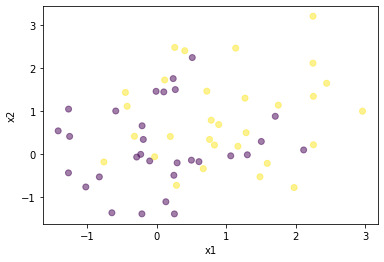

In [ ]:
# note how the two categories are plotted
# together in one go by providing the 
# label array as color argument (c=sgy)

plt.scatter(sgx[:,0], sgx[:,1], alpha=0.5, c=sgy)
plt.xlabel('x1')
plt.ylabel('x2')

### Import Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
import tensorflow as tf
from keras.regularizers import l1, l2


### Create a model that overfits

In [ ]:
# Create a Sequential MLP model with these Dense layers:
# 3 hidden layers with 50 units each and 'relu' activation
# 1 unit output with 'softmax' activation

model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
########################
## PUT YOUR CODE HERE ##
########################


In [ ]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.6)
########################
## PUT YOUR CODE HERE ##
########################

In [ ]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

model.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=['accuracy'])

########################
## PUT YOUR CODE HERE ##
########################

In [ ]:
# Start training and fit your model with desired parameters and validation_split=0.2

########################
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150)
########################

Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.6870 - accuracy: 0.5263 - val_loss: 0.5722 - val_accuracy: 0.6000
Epoch 2/150
1/1 [==============================] - 0s 31ms/step - loss: 0.6666 - accuracy: 0.6842 - val_loss: 0.5573 - val_accuracy: 0.6000
Epoch 3/150
1/1 [==============================] - 0s 34ms/step - loss: 0.6538 - accuracy: 0.6842 - val_loss: 0.5452 - val_accuracy: 0.6000
Epoch 4/150
1/1 [==============================] - 0s 31ms/step - loss: 0.6437 - accuracy: 0.7368 - val_loss: 0.5343 - val_accuracy: 0.6000
Epoch 5/150
1/1 [==============================] - 0s 30ms/step - loss: 0.6352 - accuracy: 0.7368 - val_loss: 0.5312 - val_accuracy: 0.6000
Epoch 6/150
1/1 [==============================] - 0s 29ms/step - loss: 0.6276 - accuracy: 0.7368 - val_loss: 0.5218 - val_accuracy: 0.6000
Epoch 7/150
1/1 [==============================] - 0s 30ms/step - loss: 0.6205 - accuracy: 0.7368 - val_loss: 0.5177 - val_accuracy: 0.6000
Epoch 8/150
1/1 [=====

### Plot Your Results

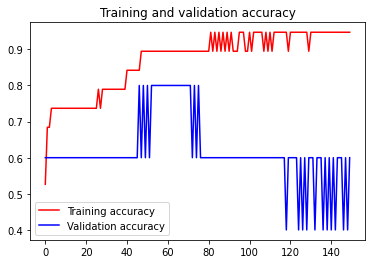

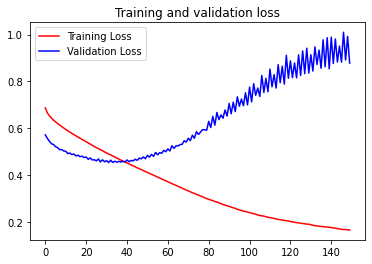

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate your model

In [ ]:
# Evaluate your model with train and test data

print(f"train evaluation : {model.evaluate(X_train, y_train)}")

print(f"test evaluation : {model.evaluate(X_test, y_test)}")
########################
## PUT YOUR CODE HERE ##
########################

1/1 [==============================] - 0s 23ms/step - loss: 0.3140 - accuracy: 0.8750
train evaluation : [0.3140222430229187, 0.875]
2/2 [==============================] - 0s 7ms/step - loss: 1.1651 - accuracy: 0.5833
test evaluation : [1.1651369333267212, 0.5833333134651184]


# Now you need to use your knowledge and methods (Regularization, Dropout, etc) to prevent overfitting and then evaluate and compare your results

In [ ]:
sgx, sgy = make_sample(30)

X_train, X_test, y_train, y_test = train_test_split(sgx, sgy, test_size=0.2, shuffle=True)


In [ ]:
model_without_overfit = Sequential()
model.add(Input(shape=(2,)))
model_without_overfit.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.05), bias_regularizer=l2(0.05)))
model_without_overfit.add(Dropout(0.1))
model_without_overfit.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.05), bias_regularizer=l2(0.05)))
model_without_overfit.add(Dropout(0.3))
model_without_overfit.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from keras.callbacks import EarlyStopping


es_loss = EarlyStopping(monitor='val_loss', mode='min', patience=5)

model_without_overfit.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=['accuracy'],
              )

history = model_without_overfit.fit(X_train, y_train, validation_split=0.3, epochs=100, callbacks=[es_loss])

Epoch 1/100
2/2 [==============================] - 1s 193ms/step - loss: 2.5210 - accuracy: 0.3939 - val_loss: 2.4080 - val_accuracy: 0.4667
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 2.4696 - accuracy: 0.4848 - val_loss: 2.3460 - val_accuracy: 0.4667
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 2.3558 - accuracy: 0.4848 - val_loss: 2.3028 - val_accuracy: 0.4667
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 2.3346 - accuracy: 0.4545 - val_loss: 2.2607 - val_accuracy: 0.4667
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 2.2811 - accuracy: 0.5152 - val_loss: 2.2087 - val_accuracy: 0.4667
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 2.2462 - accuracy: 0.5455 - val_loss: 2.1699 - val_accuracy: 0.4667
Epoch 7/100
2/2 [==============================] - 0s 26ms/step - loss: 2.1702 - accuracy: 0.5758 - val_loss: 2.1396 - val_accuracy: 0.4667
Epoch 8/100
2/2 [==

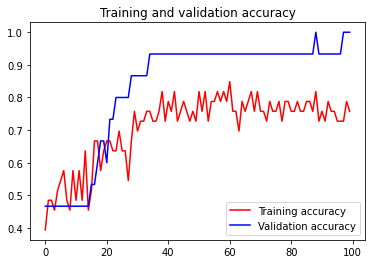

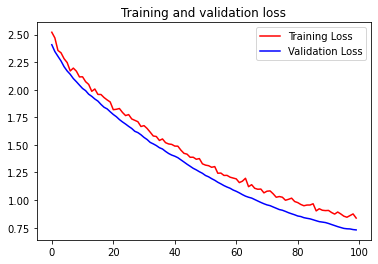

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=4, shuffle=True)

best_model = Sequential()
best_model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.05), bias_regularizer=l2(0.05)))
best_model.add(Dropout(0.1))
best_model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.05), bias_regularizer=l2(0.05)))
best_model.add(Dropout(0.3))
best_model.add(Dense(units=1, activation='sigmoid'))

best_model.compile(optimizer='rmsprop',
              loss="binary_crossentropy",
              metrics=['accuracy'],
              )

curr_fold = 1
for train, test in kfold.split(X_train, y_train):

  es_loss = EarlyStopping(monitor='val_loss', mode='min', patience=10)

  history = best_model.fit(X_train, y_train, validation_split=0.3, epochs=100, callbacks=[es_loss], verbose=0)

  print(f"fold : {curr_fold}")

  print(f"train evaluation : {best_model.evaluate(X_train, y_train)}")

  print(f"test evaluation : {best_model.evaluate(X_test, y_test)}")

  print("-" * 100)

  curr_fold += 1

fold : 1
2/2 [==============================] - 0s 11ms/step - loss: 0.8206 - accuracy: 0.8542
train evaluation : [0.8206451535224915, 0.8541666865348816]
1/1 [==============================] - 0s 57ms/step - loss: 0.7923 - accuracy: 0.7500
test evaluation : [0.7923110127449036, 0.75]
----------------------------------------------------------------------------------------------------
fold : 2
2/2 [==============================] - 0s 9ms/step - loss: 0.5830 - accuracy: 0.8333
train evaluation : [0.583027720451355, 0.8333333134651184]
1/1 [==============================] - 0s 22ms/step - loss: 0.5719 - accuracy: 0.9167
test evaluation : [0.5719218850135803, 0.9166666865348816]
----------------------------------------------------------------------------------------------------
fold : 3
2/2 [==============================] - 0s 8ms/step - loss: 0.5265 - accuracy: 0.8750
train evaluation : [0.5265281200408936, 0.875]
1/1 [==============================] - 0s 20ms/step - loss: 0.5254 - accu